In [12]:
import numpy as np
import gymnasium as gym
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from io import StringIO
from gymnasium import spaces
import random

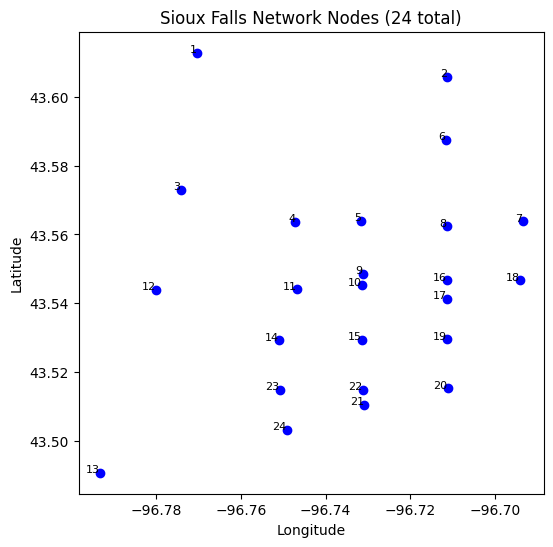

In [13]:
nodes = pd.read_csv("misc/SiouxFalls_node.tntp", sep="\t", comment='~')
nodes.columns = [c.strip(';') for c in nodes.columns]

plt.figure(figsize=(6,6))
plt.scatter(nodes['X'], nodes['Y'], c='blue')
for _, row in nodes.iterrows():
    plt.text(row['X'], row['Y'], str(int(row['Node'])), fontsize=8, ha='right')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Sioux Falls Network Nodes (24 total)")
plt.show()

In [3]:
data = """init_node	term_node	capacity	length	free_flow_time	b	power	speed	toll	link_type	;
	1	2	25900.20064	6	6	0.15	4	0	0	1	;
	1	3	23403.47319	4	4	0.15	4	0	0	1	;
	2	1	25900.20064	6	6	0.15	4	0	0	1	;
	2	6	4958.180928	5	5	0.15	4	0	0	1	;
	3	1	23403.47319	4	4	0.15	4	0	0	1	;
	3	4	17110.52372	4	4	0.15	4	0	0	1	;
	3	12	23403.47319	4	4	0.15	4	0	0	1	;
	4	3	17110.52372	4	4	0.15	4	0	0	1	;
	4	5	17782.7941	2	2	0.15	4	0	0	1	;
	4	11	4908.82673	6	6	0.15	4	0	0	1	;
	5	4	17782.7941	2	2	0.15	4	0	0	1	;
	5	6	4947.995469	4	4	0.15	4	0	0	1	;
	5	9	10000	5	5	0.15	4	0	0	1	;
	6	2	4958.180928	5	5	0.15	4	0	0	1	;
	6	5	4947.995469	4	4	0.15	4	0	0	1	;
	6	8	4898.587646	2	2	0.15	4	0	0	1	;
	7	8	7841.81131	3	3	0.15	4	0	0	1	;
	7	18	23403.47319	2	2	0.15	4	0	0	1	;
	8	6	4898.587646	2	2	0.15	4	0	0	1	;
	8	7	7841.81131	3	3	0.15	4	0	0	1	;
	8	9	5050.193156	10	10	0.15	4	0	0	1	;
	8	16	5045.822583	5	5	0.15	4	0	0	1	;
	9	5	10000	5	5	0.15	4	0	0	1	;
	9	8	5050.193156	10	10	0.15	4	0	0	1	;
	9	10	13915.78842	3	3	0.15	4	0	0	1	;
	10	9	13915.78842	3	3	0.15	4	0	0	1	;
	10	11	10000	5	5	0.15	4	0	0	1	;
	10	15	13512.00155	6	6	0.15	4	0	0	1	;
	10	16	4854.917717	4	4	0.15	4	0	0	1	;
	10	17	4993.510694	8	8	0.15	4	0	0	1	;
	11	4	4908.82673	6	6	0.15	4	0	0	1	;
	11	10	10000	5	5	0.15	4	0	0	1	;
	11	12	4908.82673	6	6	0.15	4	0	0	1	;
	11	14	4876.508287	4	4	0.15	4	0	0	1	;
	12	3	23403.47319	4	4	0.15	4	0	0	1	;
	12	11	4908.82673	6	6	0.15	4	0	0	1	;
	12	13	25900.20064	3	3	0.15	4	0	0	1	;
	13	12	25900.20064	3	3	0.15	4	0	0	1	;
	13	24	5091.256152	4	4	0.15	4	0	0	1	;
	14	11	4876.508287	4	4	0.15	4	0	0	1	;
	14	15	5127.526119	5	5	0.15	4	0	0	1	;
	14	23	4924.790605	4	4	0.15	4	0	0	1	;
	15	10	13512.00155	6	6	0.15	4	0	0	1	;
	15	14	5127.526119	5	5	0.15	4	0	0	1	;
	15	19	14564.75315	3	3	0.15	4	0	0	1	;
	15	22	9599.180565	3	3	0.15	4	0	0	1	;
	16	8	5045.822583	5	5	0.15	4	0	0	1	;
	16	10	4854.917717	4	4	0.15	4	0	0	1	;
	16	17	5229.910063	2	2	0.15	4	0	0	1	;
	16	18	19679.89671	3	3	0.15	4	0	0	1	;
	17	10	4993.510694	8	8	0.15	4	0	0	1	;
	17	16	5229.910063	2	2	0.15	4	0	0	1	;
	17	19	4823.950831	2	2	0.15	4	0	0	1	;
	18	7	23403.47319	2	2	0.15	4	0	0	1	;
	18	16	19679.89671	3	3	0.15	4	0	0	1	;
	18	20	23403.47319	4	4	0.15	4	0	0	1	;
	19	15	14564.75315	3	3	0.15	4	0	0	1	;
	19	17	4823.950831	2	2	0.15	4	0	0	1	;
	19	20	5002.607563	4	4	0.15	4	0	0	1	;
	20	18	23403.47319	4	4	0.15	4	0	0	1	;
	20	19	5002.607563	4	4	0.15	4	0	0	1	;
	20	21	5059.91234	6	6	0.15	4	0	0	1	;
	20	22	5075.697193	5	5	0.15	4	0	0	1	;
	21	20	5059.91234	6	6	0.15	4	0	0	1	;
	21	22	5229.910063	2	2	0.15	4	0	0	1	;
	21	24	4885.357564	3	3	0.15	4	0	0	1	;
	22	15	9599.180565	3	3	0.15	4	0	0	1	;
	22	20	5075.697193	5	5	0.15	4	0	0	1	;
	22	21	5229.910063	2	2	0.15	4	0	0	1	;
	22	23	5000	4	4	0.15	4	0	0	1	;
	23	14	4924.790605	4	4	0.15	4	0	0	1	;
	23	22	5000	4	4	0.15	4	0	0	1	;
	23	24	5078.508436	2	2	0.15	4	0	0	1	;
	24	13	5091.256152	4	4	0.15	4	0	0	1	;
	24	21	4885.357564	3	3	0.15	4	0	0	1	;
	24	23	5078.508436	2	2	0.15	4	0	0	1	;
"""

In [4]:
edges = pd.read_csv(
    StringIO(data),
    sep=r"\s+",
    engine="python",
    comment="~",
)

edges = edges.replace(';', '', regex=True)
edges = edges.loc[:, ~edges.columns.str.contains('^Unnamed')]

edges = edges.apply(pd.to_numeric)
edges = edges.drop(';', axis=1)


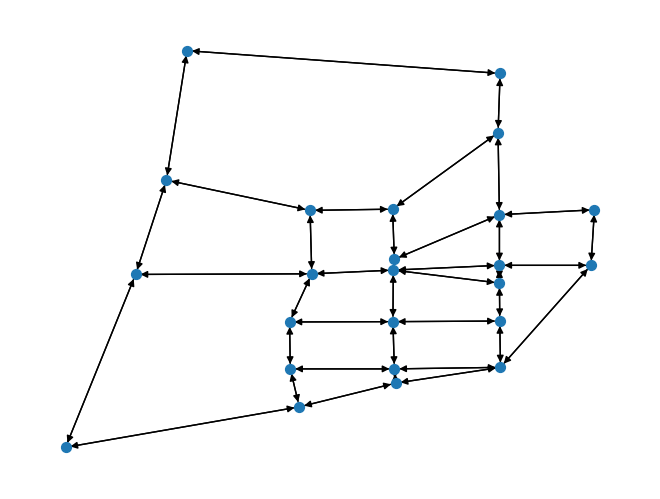

In [5]:
edges.columns = edges.columns.str.strip().str.lower()
nodes.columns = nodes.columns.str.strip().str.lower()

G = nx.from_pandas_edgelist(edges, 'init_node', 'term_node', edge_attr=True, create_using=nx.DiGraph)
nx.set_node_attributes(G, nodes.set_index('node')[['x','y']].to_dict('index'))

pos = {n: (d['x'], d['y']) for n, d in G.nodes(data=True)}
nx.draw(G, pos, node_size=50, arrowsize=10)
plt.show()

In [6]:
for u, v, data in G.edges(data=True):
    print(u, "→", v, data)



1 → 2 {'capacity': 25900.20064, 'length': 6, 'free_flow_time': 6, 'b': 0.15, 'power': 4, 'speed': 0, 'toll': 0, 'link_type': 1}
1 → 3 {'capacity': 23403.47319, 'length': 4, 'free_flow_time': 4, 'b': 0.15, 'power': 4, 'speed': 0, 'toll': 0, 'link_type': 1}
2 → 1 {'capacity': 25900.20064, 'length': 6, 'free_flow_time': 6, 'b': 0.15, 'power': 4, 'speed': 0, 'toll': 0, 'link_type': 1}
2 → 6 {'capacity': 4958.180928, 'length': 5, 'free_flow_time': 5, 'b': 0.15, 'power': 4, 'speed': 0, 'toll': 0, 'link_type': 1}
3 → 1 {'capacity': 23403.47319, 'length': 4, 'free_flow_time': 4, 'b': 0.15, 'power': 4, 'speed': 0, 'toll': 0, 'link_type': 1}
3 → 4 {'capacity': 17110.52372, 'length': 4, 'free_flow_time': 4, 'b': 0.15, 'power': 4, 'speed': 0, 'toll': 0, 'link_type': 1}
3 → 12 {'capacity': 23403.47319, 'length': 4, 'free_flow_time': 4, 'b': 0.15, 'power': 4, 'speed': 0, 'toll': 0, 'link_type': 1}
6 → 2 {'capacity': 4958.180928, 'length': 5, 'free_flow_time': 5, 'b': 0.15, 'power': 4, 'speed': 0, 't

In [ ]:
#Changes needed
#traffic flow
#HV price model
#contants to change A and B in BPR
#AV profit model or reward
#traveller choice model

class mapENV(gym.Env):
    metadata = {"render_modes": ["human"]}

    def __init__(self, G: nx.classes.digraph.DiGraph, numHV: int, numAV: int, seed=None):
        super().__init__()
        self.np_random, _ = gym.utils.seeding.np_random(seed)


        #BPR, a and b given by chatGPT
        a, b = 0.15, 4
        for u, v, data in G.edges(data=True):
            c = data.get('capacity')
            f = max(0, c * self.np_random.normal(loc=0.5, scale=0.2))
            G[u][v]['time'] = data.get('free_flow_time') * (1 + a * (f / c) ** b)


        #variables
        self.G = G
        self.numHV = numHV
        self.numAV = numAV
        self.seed = seed
        self.time_step = 0
        self.max_time = 1440  #1 day


        nodes = list(self.G.nodes)
        self.AV_positions = self.np_random.choice(nodes, size=self.numAV, replace=True)
        self.AV_available = np.zeros(numAV, dtype=np.int32)  #countdown array until free

        self.traveller = None


        #action space
        self.action_space = spaces.MultiDiscrete([200, self.numAV])


        #obs space
        self.observation_space = spaces.Dict({
            "AV_positions": spaces.Box(
                low=0,
                high=len(nodes)-1,
                shape=(self.numAV,),
                dtype=np.float32
            ),
            "AV_available": spaces.Box(
                low=0,
                high=10000,
                shape=(self.numAV,),
                dtype=np.float32
            ),
            "traveller": spaces.Box(
                low=-1,
                high=len(nodes)-1,
                shape=(2,),
                dtype=np.float32
            ),
            "time": spaces.Box(
                low=0,
                high=self.max_time,
                shape=(1,),
                dtype=np.float32
            )
        })




    def _get_obs(self):
        # time to get to O
        # time from O to D
        # dead head cost of trip for each veichle
        # cost of trip
        return {
            "AV_positions": self.AV_positions.copy(),
            "AV_available": self.AV_available.copy(),
            "traveller": np.array(self.traveller if self.traveller else [-1, -1], dtype=np.int32),
            "time": np.array([self.time_step], dtype=np.float32)
        }




    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.time_step = 0
        nodes = list(self.G.nodes)
        self.AV_positions = self.np_random.choice(nodes, size=self.numAV, replace=True)
        self.AV_available = np.zeros(self.numAV, dtype=np.int32)
        self.traveller = None
        return self._get_obs(), {}




    def step(self, action):
        reward = 0
        terminated = False
        truncated = False
        info = {}

        fare_idx, vID = action
        AVprice = fare_idx * 0.5
        vID = int(vID)

        # penalty for invalid index. dont think needed
        if vID < 0 or vID >= self.numAV:
            return self._get_obs(), -200, False, False, info

        # if traveller
        if self.np_random.integers(0, 50) == 1:  #2% chance of request
            nodes = list(self.G.nodes)
            o, d = self.np_random.choice(nodes, size=2, replace=False)
            self.traveller = (o, d)

            # Compute path and HV baseline cost
            path = nx.dijkstra_path(self.G, source=o, target=d, weight="time")
            total_time = nx.path_weight(self.G, path, "time")
            dist = nx.path_weight(self.G, path, "length")

            # HV price model
            BaseFare, TimeFare, DistFare = 5, 0.5, 0.5
            HVprice = BaseFare + TimeFare * total_time + DistFare * dist
            HVwait = self.np_random.normal(loc=8, scale=1)

            # Compute deadhead trip to pickup
            path_to_pickup = nx.dijkstra_path(self.G, self.AV_positions[vID], o, weight="time")
            AVwait = nx.path_weight(self.G, path_to_pickup, "time")
            AVdeaddist = nx.path_weight(self.G, path_to_pickup, "length")

            # Traveller Choice
            HVscore = HVwait * 0.1 + HVprice
            AVscore = AVwait * 0.1 + AVprice
            SDscore = 100

            choice = min({"HV": HVscore, "AV": AVscore, "SD": SDscore},
                        key=lambda x: {"HV": HVscore, "AV": AVscore, "SD": SDscore}[x])

            if choice == "AV":
                if self.AV_available[vID] == 0:  # vehicle free
                    w, e, r, t = 1, 1, 1, 1
                    reward = AVprice - AVwait*w - AVdeaddist*e - total_time*r - dist*t

                    self.AV_available[vID] = int(AVwait + total_time)
                    self.AV_positions[vID] = d
                else:
                    reward = -100  # AV unavailable

            else:
                reward = 0  # HV or SD chosen: no reward

        # time updates
        self.time_step += 1
        self.AV_available = np.maximum(self.AV_available - 1, 0)

        if self.time_step >= self.max_time:
            truncated = True

        return self._get_obs(), reward, terminated, truncated, info


In [8]:
from stable_baselines3.common.callbacks import BaseCallback
import numpy as np

class RewardLoggingCallback(BaseCallback):
    def __init__(self, verbose=0):
        super().__init__(verbose)
        self.episode_rewards = []
        self.current_rewards = 0

    def _on_step(self) -> bool:
        # Collect reward
        self.current_rewards += self.locals["rewards"][0]

        # Done? Log episode reward
        if self.locals["dones"][0]:
            self.episode_rewards.append(self.current_rewards)
            self.current_rewards = 0

        return True


In [9]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

env = mapENV(G, numHV=3, numAV=3)
callback = RewardLoggingCallback()
model = PPO("MultiInputPolicy", env, verbose=1)
model.learn(total_timesteps=200000, callback=callback)



Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.44e+03 |
|    ep_rew_mean     | -305     |
| time/              |          |
|    fps             | 3168     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.44e+03    |
|    ep_rew_mean          | -219        |
| time/                   |             |
|    fps                  | 2016        |
|    iterations           | 2           |
|    time_elapsed         | 2           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.017188512 |
|    clip_fraction        | 0.289       |
|    clip_range           | 0.2         |
|    entropy_loss   

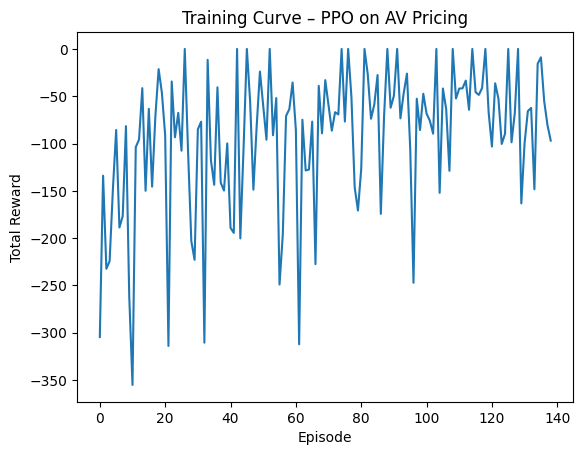

In [10]:
import matplotlib.pyplot as plt

plt.plot(callback.episode_rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Training Curve – PPO on AV Pricing")
plt.show()
